# HW 6

This assignment covers all fundamental concepts required for completing a project

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Support Vector machine example](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py)
* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
* [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Import all required library 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
import lightgbm as lgbm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

# Data Processing

**Q1** Get training data from the dataframe
1. Load ```HW6_data.csv``` from ```data``` folder into data frame
2. Print the head of the dataframe
3. Print the shape of the dataframe
4. Print the description of the dataframe
5. Check if the dataset has NULL values. (Show number of NULL values per column)
5. Assign ```Cover_Type``` values to Y
6. Assign rest of the column values to X

**A1** Fill the cell blocks below, Create new cell as per your necessary

In [7]:
#You can create or remove cells as per your need
df = pd.read_csv('C:\\Users\\alsae\\Desktop\\fake\\2024Spring\\data\\HW6_data.csv')
print(df.head(5))
print(df.shape)
print(df.describe())
print(df.isnull().sum())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3080.0     137   18.0                               166   
1     2758.0      19    8.0                               551   
2     2779.0      86    9.0                                43   
3     2811.0     296    0.0                               287   
4     2956.0     314   26.0                                71   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               1                             1009   
1                              49                             1766   
2                             -10                             3889   
3                               4                              788   
4                              22                             2910   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          250.0             198            166   
1          225.0             231            124   
2          155.0             204   

In [8]:
X=df.drop(columns=['Cover_Type'])
Y=df['Cover_Type']

**Q2:** Open-Ended Questions: Observe the range of all feature values and statistical information from the dataframe description above.
1. If the dataset has NULL values, Give proper justification about the methods you will use to replace NULL values for specific columns.  
2. Do you think in our dataset normalization is required? -- Give proper justification based on your opinion. 
3. What type of normalization/Scaling technique you whould recommend for our dataset?

**A2** 

```Answer 1:``` 

```Answer 2:```

```Answer 3:```

**Q3:** 
1. Replace the null values with the best possible methods from your above observation
1. Use the above mentioned normalization technique on our HW_6 dataset.
2. Transform the X dataframe using choosen normalization technique. 

### ```Note:``` Make sure the scaled X has all column name same as ```X dataframe```

**A3** Fill the cell blocks below, Create new cell as per your necessary

In [9]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna(X[col].mode()[0])
    else:
        X[col] = X[col].fillna(X[col].mean())

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
Scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
Scaled_X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.515460,0.386946,0.328125,0.131695,0.330549,0.159016,0.848057,0.661538,0.677215,0.468222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.384459,0.111888,0.171875,0.374291,0.387828,0.255547,0.759717,0.830769,0.544304,0.226759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.393002,0.268065,0.187500,0.054190,0.317422,0.526269,0.512367,0.692308,0.541139,0.070725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
3,0.406021,0.757576,0.046875,0.207940,0.334129,0.130834,0.639576,0.805128,0.509494,0.043991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.465012,0.799534,0.453125,0.071834,0.355609,0.401428,0.777385,0.671795,0.465190,0.116782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.030707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.288853,0.188811,0.171875,0.080655,0.291169,0.088243,0.621908,0.651282,0.683544,0.133674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
79996,0.370627,0.100233,0.218750,0.261500,0.377088,0.213721,0.745583,0.912821,0.629747,0.228096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
79997,0.557771,0.552448,0.109375,0.335224,0.323389,0.519000,0.805654,0.800000,0.677215,0.119091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
79998,0.635883,0.081585,0.359375,0.299937,0.357995,0.193573,0.568905,0.794872,0.569620,0.103172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000


**Q4:** 

1. Check again and show if there is any null values left in our ```Scaled_X```.
2. Print all unique values/ different class id from the ```Y data```.


**A4** Fill the cell blocks below, Create new cell as per your necessary

In [12]:
print("NULL values in Scaled_X:")
print(Scaled_X.isnull().sum())

NULL values in Scaled_X:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11    

In [13]:
# Print unique values from Y
print("\nUnique values in Y:")
print(Y.unique())


Unique values in Y:
[1 2 3 7 6 4]


## Part 1: Use a subset of whole data(N=20000) for Data Visualization



**Data Subset Creation**

1. First we are Selecting ```N=20000``` random rows from our original dataset which is ```df``` and create a new subset of data.

2. Using the below **rndperm** and selecting first N index from the ```Scaled_X``` and ```Y```

In [16]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 20000
data_subset_x = Scaled_X.loc[rndperm[:N],:].copy()
data_subset_y = Y.loc[rndperm[:N]].copy()

**Q5:**

1. Use PCA and reduce the dimension of the **data_subset_x** into ```3```.
2. Store the PCA reuslt into ```pca_result``` variable
3. Add the resutls from the PCA into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


**A5** Fill the below cells. Use extra cells as per your necessary

In [17]:
#You can create or remove cells as per your need
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset_x)

In [18]:
data_subset_x['PCA_Component_1'] = pca_result[:, 0]
data_subset_x['PCA_Component_2'] = pca_result[:, 1]
data_subset_x['PCA_Component_3'] = pca_result[:, 2]

**Q6:**

1. Use TSNE and reduce the dimension of the **data_subset_x** into ```2```.
2. Store the TSNE reuslt into ```tsne_results``` variable
3. Add the resutls from the T-SNE into the **data_subset_x** as new columns. (Choose any meaningful names for the columns) 


```Note:``` 
1. You can use ```from sklearn.manifold import TSNE``` for TSNE initialization.
2. Give value of n_components as per the question.
3. Also use other parameters while TSNE initialization as, ```verbose=1, perplexity=40, n_iter=300```

**A6** Fill the below cells. Use extra cells as per your necessary

In [19]:
#You can create or remove cells as per your need
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset_x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.006s...
[t-SNE] Computed neighbors for 20000 samples in 1.386s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [20]:
data_subset_x['tSNE_Component_1'] = tsne_results[:, 0]
data_subset_x['tSNE_Component_2'] = tsne_results[:, 1]

**Q7:**

1. Create a new dataframe with name ```df_plot```
2. This dataframe will merge everything from **data_subset_x** and **data_subset_y**
3. We need to give a name for the ```data_subset_y``` column. Use ```Cover_Type``` as the name of the column


**A7** Fill the below cells. Use extra cells as per your necessary

In [21]:

df_plot = pd.concat([data_subset_x, data_subset_y.rename('Cover_Type')], axis=1)


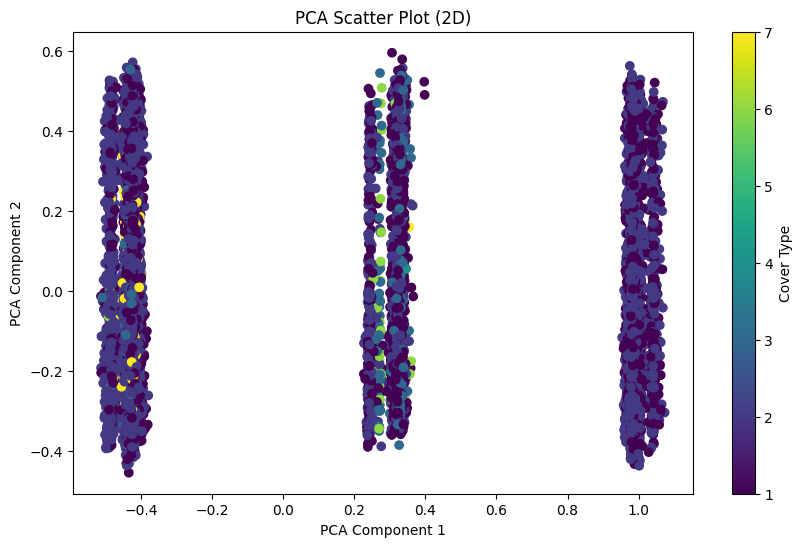

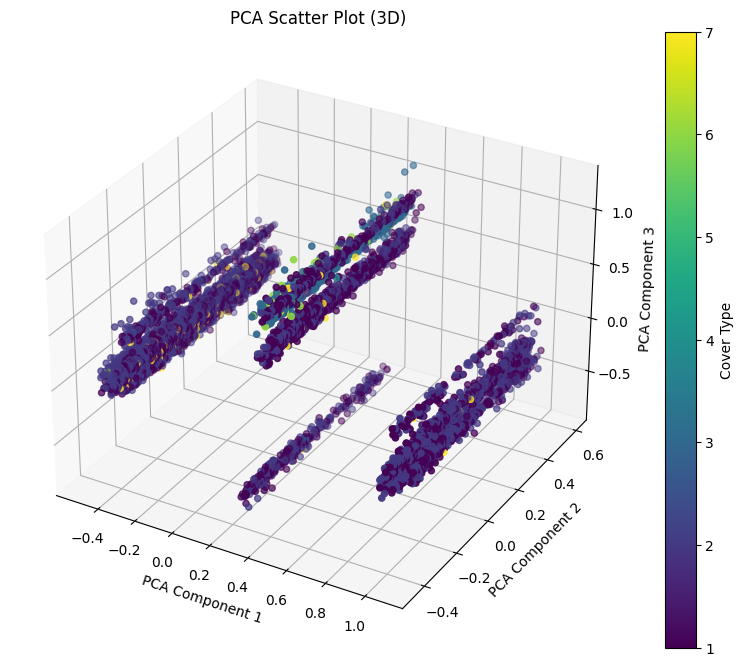

In [22]:

# Plotting in 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['PCA_Component_1'], df_plot['PCA_Component_2'], c=df_plot['Cover_Type'], cmap='viridis')
plt.title('PCA Scatter Plot (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cover Type')
plt.show()

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_plot['PCA_Component_1'], df_plot['PCA_Component_2'], df_plot['PCA_Component_3'], c=df_plot['Cover_Type'], cmap='viridis')
ax.set_title('PCA Scatter Plot (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, label='Cover Type')
plt.show()

**Q8:** Now we will plot all points from our dataframe ```df_plot``` Using the result from **PCA**

1. Use ```pca-one``` and ```pca-two``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.

```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:```https://git.txstate.edu/ML/2024Spring/tree/main/project/examples/Data_Viz_with_PCA_TSNE.ipynb

**A8** Fill the below cells. Use extra cells as per your necessary

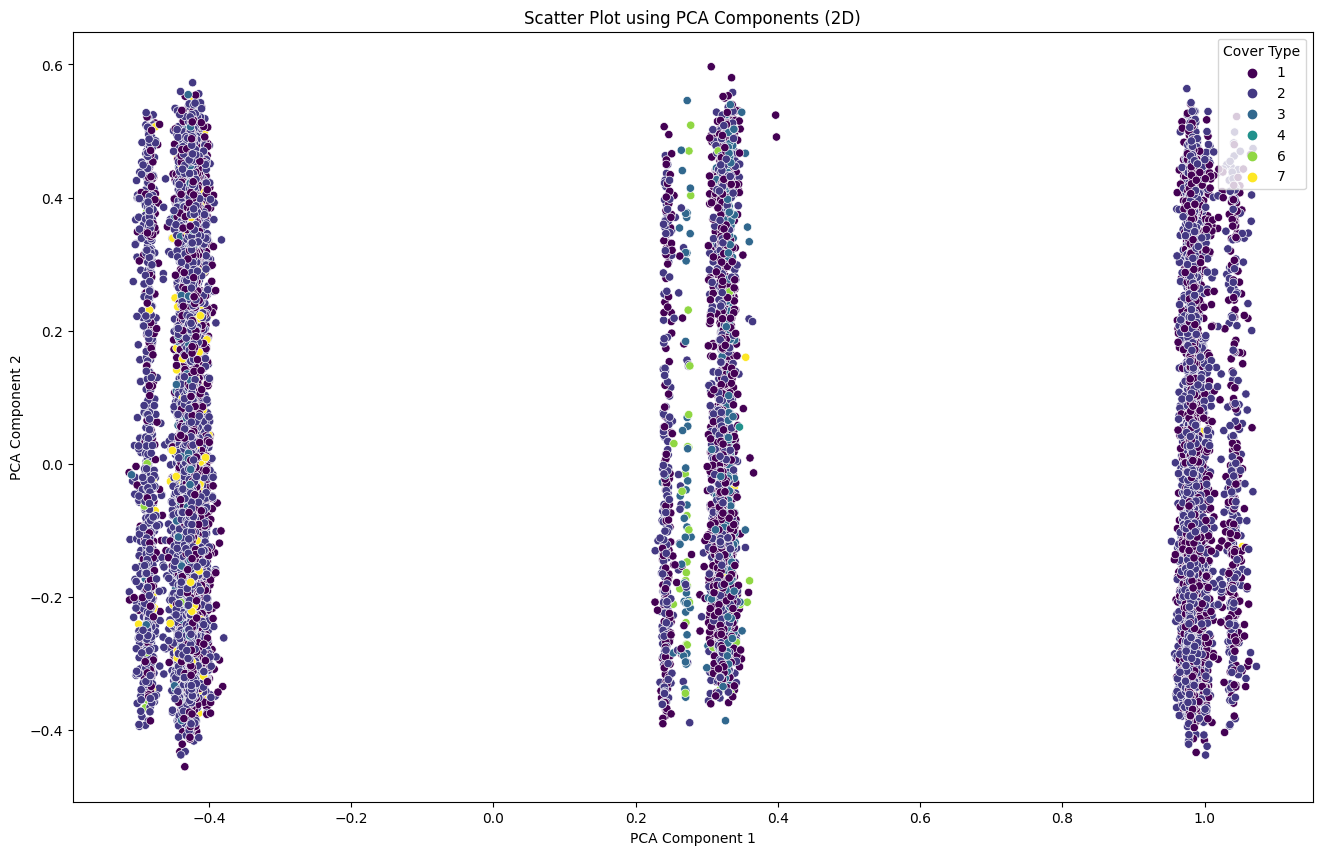

In [23]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_plot, x='PCA_Component_1', y='PCA_Component_2', hue='Cover_Type', palette='viridis')
plt.title('Scatter Plot using PCA Components (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cover Type')
plt.show()

**Q9:** Now we will plot all points from our dataframe ```df_plot``` Using result from T-SNE.

1. Use ```tsne-2d-one``` and ```tsne-2d-one``` column as X and Y axis respectively.
2. Use seaborn scatterplot for plotting the points.


```Note:``` Use the notebook from class for reference. The link is provided below.

```Link:``` https://git.txstate.edu/ML/2024Spring/tree/main/project/examples/Data_Viz_with_PCA_TSNE.ipynb

**A9** Fill the below cells. Use extra cells as per your necessary

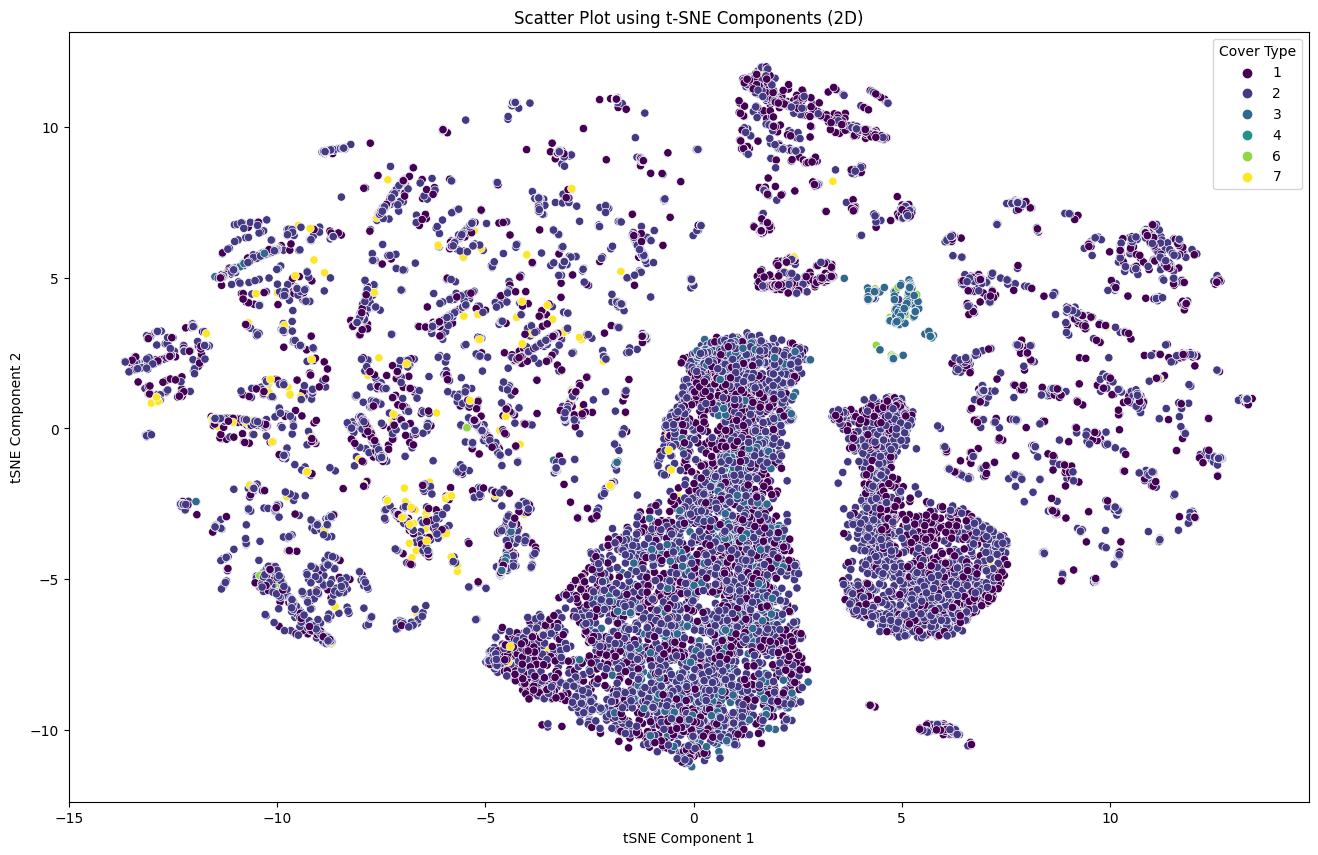

In [24]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_plot, x='tSNE_Component_1', y='tSNE_Component_2', hue='Cover_Type', palette='viridis')
plt.title('Scatter Plot using t-SNE Components (2D)')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(title='Cover Type')
plt.show()

## Part 2: Data Analysis and Classification Using Entire Dataset

**Q10:** Observe the data plotting and find the realtion between datapoints and their characteristics.


1. Reduce the dimension of our ```Scaled_X``` dataframe to ```3``` using PCA algorithm.
2. Store the result into a variable named ```pca_result```
3. Create Train data and Test data using the pca_result and Y.

```Note:``` 
1. Consider pca_result as X values, and Y as y values.
2. You can use sklearn train_test_split
3. Keep Train and Test ratio as : 75%:25%

**A10** Fill the below cells. Use extra cells as per your necessary

In [25]:
#You can create or remove cells as per your need
pca = PCA(n_components=3)
pca_result = pca.fit_transform(Scaled_X)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(pca_result, Y, test_size=0.25, random_state=42)

### Now, Select Three best model for our dataset. You have to decide three models which might work well with our dataset. 

**Q11** 

**Model Number 1** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A11** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
 Random Forest is a versatile and powerful ensemble learning method that is known for its robustness and ability to handle high-dimensional data with complex relationships.




In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model with the training data
rf_model.fit(x_train, y_train)

# Get the accuracy score from the model using the test data
rf_score = rf_model.score(x_test, y_test)
print("Accuracy score for Random Forest Classifier:", rf_score)

Accuracy score for Random Forest Classifier: 0.60825


**Q12** 

**Model Number 2** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A12** Fill the below cells. Use extra cells as per your necessaryReplace ??? with code in the code cell below

```Answer for Q.No:1 goes here```
 SVMs are powerful models known for their effectiveness in high-dimensional spaces, making them suitable for our dataset. They work well with complex relationships and can handle both linear and non-linear data.




In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize Support Vector Machine Classifier
svm_model = SVC()

# Fit the model with the training data
svm_model.fit(x_train, y_train)

# Get the accuracy score from the model using the test data
svm_score = svm_model.score(x_test, y_test)
print("Accuracy score for Support Vector Machine Classifier:", svm_score)

Accuracy score for Support Vector Machine Classifier: 0.5886


**Q13** 

**Model Number 3** 

1. Reason behind choosing the model.
2. Create the model using sklearn or any proper library
3. Fit the model with the train data 
4. Get the score from the model using test data

**A13** Fill the below cells. Use extra cells as per your necessary

```Answer for Q.No:1 goes here```
Gradient Boosting is an ensemble learning method that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It is known for its high predictive accuracy and ability to handle complex relationships in the data.




In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Fit the model with the training data
gb_model.fit(x_train, y_train)

# Get the accuracy score from the model using the test data
gb_score = gb_model.score(x_test, y_test)
print("Accuracy score for Gradient Boosting Classifier:", gb_score)

Accuracy score for Gradient Boosting Classifier: 0.6114


**Q14** 


1. Plot a histogram using Y dataframe and display the per-class data distribution(number of rows per class).
2. Also print the number of rows per class as numeric value.

**A14** Fill the below cells. Use extra cells as per your necessary

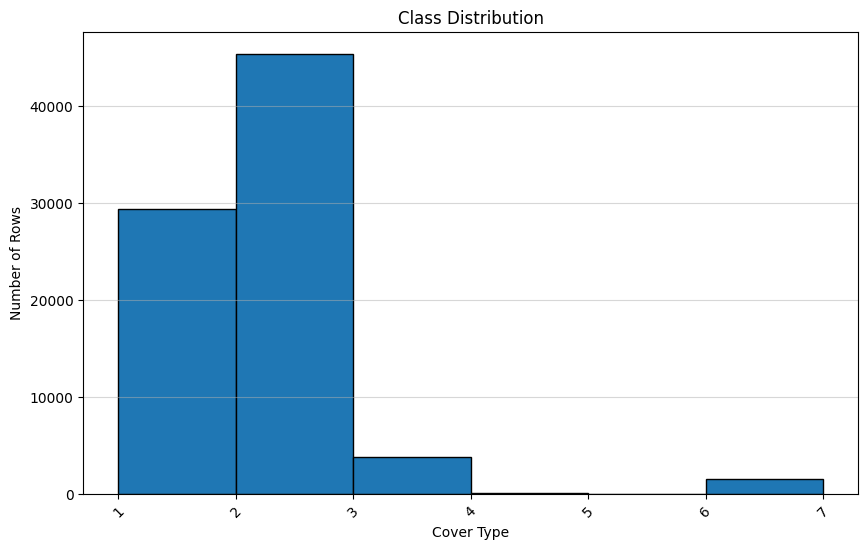

Number of rows per class:
2    45393
1    29311
3     3816
7     1245
6      229
4        6
Name: Cover_Type, dtype: int64


In [30]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=len(Y.unique()), edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Print number of rows per class
print("Number of rows per class:")
print(Y.value_counts())

**Q15** 


1. From the histogram we can see that the dataset is highly imbalanced.
2. Use a proper dataset balancing technique to make the dataset balanced.
3. Plot a histogram using new y values and display the per-class data distribution(number of rows per class).

```Note:``` Use can use the ```imblearn.over_sampling``` library for this task. But use appropriate strategy for the method.

Follow the documentation for details: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

**A15** Fill the below cells. Use extra cells as per your necessary

In [31]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the dataset
X_res, y_res = smote.fit_resample(Scaled_X, Y)

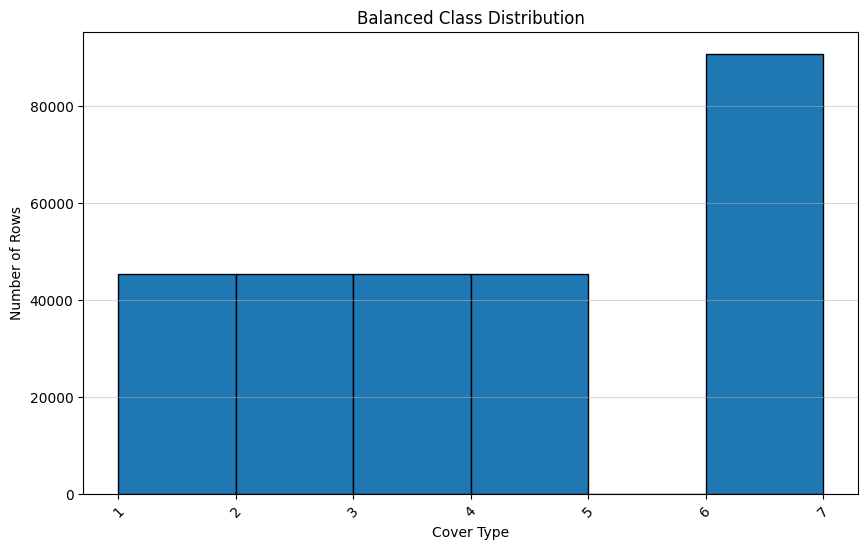

In [32]:
import matplotlib.pyplot as plt

# Plot histogram for balanced data
plt.figure(figsize=(10, 6))
plt.hist(y_res, bins=len(y_res.unique()), edgecolor='black')
plt.title('Balanced Class Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

**Q16** 


1. Create new Train and Test data from the balaned X and Y value.
2. Keep Train and Test ratio as : 75%:25%

**A16** Fill the below cells. Use extra cells as per your necessary

In [33]:
from sklearn.model_selection import train_test_split

# Split the balanced data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)


**Q17**

### Now, Use the previously initialized three models and calculate the score from our new balanced dataset.



**Model Number 1** 

1. Fit the model with the new train data(Use the previous Model 1) 
2. Get the score from the model using  new test data

**A17** Fill the below cells. Use extra cells as per your necessary

In [34]:
# Fit the Random Forest model with the new train data
rf_model.fit(x_train, y_train)

# Get the accuracy score from the model using the new test data
rf_score_balanced = rf_model.score(x_test, y_test)
print("Accuracy score for Random Forest Classifier with balanced data:", rf_score_balanced)


Accuracy score for Random Forest Classifier with balanced data: 0.9824643853723014


**Model Number 2** 

1. Fit the model with the new train data(Use the previous Model 2) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [35]:
# Fit the Support Vector Machine model with the new train data
svm_model.fit(x_train, y_train)

# Get the accuracy score from the model using the new test data
svm_score_balanced = svm_model.score(x_test, y_test)
print("Accuracy score for Support Vector Machine Classifier with balanced data:", svm_score_balanced)


Accuracy score for Support Vector Machine Classifier with balanced data: 0.9521956234395653


**Model Number 3** 

1. Fit the model with the new train data(Use the previous Model 3) 
2. Get the score from the model using  new test data

Fill the below cells. Use extra cells as per your necessary

In [36]:
# Fit the Gradient Boosting model with the new train data
gb_model.fit(x_train, y_train)

# Get the accuracy score from the model using the new test data
gb_score_balanced = gb_model.score(x_test, y_test)
print("Accuracy score for Gradient Boosting Classifier with balanced data:", gb_score_balanced)


Accuracy score for Gradient Boosting Classifier with balanced data: 0.9388015861359965


### After making the dataset balanced we can see a significant improve in the performence for all three models.